# Beginner - EDA and Visualizations


Beginner Section Activities (Basic Data Analysis or EDA):
* Import / initial look (see dataframe)
* Plot several histograms of features
* Using different plotting libraries (scatterplot)
    - Seaborn, Altair, Matplotlib
* Show basic statistics
* Identifying problems (0 value columns)
* Subset by features and by samples
    - In context of training / testing
    - Possibly do correlation with column subset 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')

In [2]:
# loading data from csv files
raw_data = pd.read_csv('data.csv')
data_labels = pd.read_csv('labels.csv')

In [3]:
# checking the loaded data frame
raw_data.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [22]:
# describe will give some statistical values
data_stat_describe = raw_data.describe()
data_stat_describe

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.0,801.000000,801.000000,801.000000,801.000000,...,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.026642,3.010909,3.095350,6.722305,9.813612,0.0,7.405509,0.499882,0.016744,0.013428,...,5.896573,8.765891,10.056252,4.847727,9.741987,11.742228,10.155271,9.590726,5.528177,0.095411
std,0.136850,1.200828,1.065601,0.638819,0.506537,0.0,1.108237,0.508799,0.133635,0.204722,...,0.746399,0.603176,0.379278,2.382728,0.533898,0.670371,0.580569,0.563849,2.073859,0.364529
min,0.000000,0.000000,0.000000,5.009284,8.435999,0.0,3.930747,0.000000,0.000000,0.000000,...,2.853517,6.678368,8.669456,0.000000,7.974942,9.045255,7.530141,7.864533,0.593975,0.000000
25%,0.000000,2.299039,2.390365,6.303346,9.464466,0.0,6.676042,0.000000,0.000000,0.000000,...,5.454926,8.383834,9.826027,3.130750,9.400747,11.315857,9.836525,9.244219,4.092385,0.000000
50%,0.000000,3.143687,3.127006,6.655893,9.791599,0.0,7.450114,0.443076,0.000000,0.000000,...,5.972582,8.784144,10.066385,5.444935,9.784524,11.749802,10.191207,9.566511,5.218618,0.000000
75%,0.000000,3.883484,3.802534,7.038447,10.142324,0.0,8.121984,0.789354,0.000000,0.000000,...,6.411292,9.147136,10.299025,6.637412,10.082269,12.177852,10.578561,9.917888,6.876382,0.000000
max,1.482332,6.237034,6.063484,10.129528,11.355621,0.0,10.718190,2.779008,1.785592,4.067604,...,7.771054,11.105431,11.318243,9.207495,11.811632,13.715361,11.675653,12.813320,11.205836,5.254133


In [5]:
# shape tells us the number of rows (individual cases) and coloumns (genes)
raw_data.shape

(801, 20532)

Data is in what is known as **wide format**, more columns than rows. Given we are interested in doing some EDA and visualizations, it is more conveninent to have a dataframe in **long format**, which can be accomplish by transposing the dataframe.

In [6]:
data_transpose = raw_data.T
data_transpose.head()

,0,1,2,3,4,5,6,7,8,9,...,791,792,793,794,795,796,797,798,799,800
Unnamed: 0,sample_0,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8,sample_9,...,sample_791,sample_792,sample_793,sample_794,sample_795,sample_796,sample_797,sample_798,sample_799,sample_800
gene_0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.436588,0,0,0,0,0
gene_1,2.01721,0.592732,3.51176,3.66362,2.65574,3.46785,1.22497,2.85485,3.99212,3.64249,...,3.08006,4.3374,2.06822,4.28839,4.47218,1.86564,3.94296,3.24958,2.59034,2.32524
gene_2,3.26553,1.58842,4.3272,4.50765,2.82155,3.58192,1.69118,1.75048,2.77273,4.42356,...,2.81574,2.59713,0.857663,3.45249,4.90875,2.7182,4.45381,3.70749,2.78798,3.80593
gene_3,5.47849,7.58616,6.88179,6.65907,6.53945,6.62024,6.57201,7.22672,6.54669,6.84951,...,6.20962,6.07038,6.21874,7.20915,5.93785,7.3501,6.3466,8.1859,7.31862,6.53025


Ok now we see that the *genes* are in the rows, but we see that the *samples* became the first row and we want them to be headers.

In [8]:
data_transpose_new_headers_df = data_transpose.copy()
dt_new_header = data_transpose_new_headers_df.iloc[0] #grab the first row for the header
data_transpose_new_headers_df = data_transpose_new_headers_df[1:] #take the data less the header row
data_transpose_new_headers_df.columns = dt_new_header #set the header row as the df header

In [9]:
data_transpose_new_headers_df.head()

Unnamed: 0,sample_0,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8,sample_9,...,sample_791,sample_792,sample_793,sample_794,sample_795,sample_796,sample_797,sample_798,sample_799,sample_800
gene_0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.436588,0,0,0,0,0
gene_1,2.01721,0.592732,3.51176,3.66362,2.65574,3.46785,1.22497,2.85485,3.99212,3.64249,...,3.08006,4.3374,2.06822,4.28839,4.47218,1.86564,3.94296,3.24958,2.59034,2.32524
gene_2,3.26553,1.58842,4.3272,4.50765,2.82155,3.58192,1.69118,1.75048,2.77273,4.42356,...,2.81574,2.59713,0.857663,3.45249,4.90875,2.7182,4.45381,3.70749,2.78798,3.80593
gene_3,5.47849,7.58616,6.88179,6.65907,6.53945,6.62024,6.57201,7.22672,6.54669,6.84951,...,6.20962,6.07038,6.21874,7.20915,5.93785,7.3501,6.3466,8.1859,7.31862,6.53025
gene_4,10.432,9.62301,9.87073,10.1962,9.73826,9.70683,9.64051,9.75869,10.4883,9.46447,...,9.64447,9.86399,10.6231,9.87562,9.3309,10.006,10.0569,9.50408,9.98714,9.56037


Now to make a simpler handling when plostting the data in **seaborn**, we'll take the index of the dataframe (*Unnamed: 0*) and reset it to get a number for each gene. This will be the fastest way to go through the 20K genes.

In [10]:
data_transpose_new_headers_df.reset_index(inplace=True)
data_transpose_new_headers_df['gene'] = data_transpose_new_headers_df.index

data_transpose_new_headers_df.head()

Unnamed: 0,index,sample_0,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8,...,sample_792,sample_793,sample_794,sample_795,sample_796,sample_797,sample_798,sample_799,sample_800,gene
0,gene_0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.436588,0,0,0,0,0,0
1,gene_1,2.01721,0.592732,3.51176,3.66362,2.65574,3.46785,1.22497,2.85485,3.99212,...,4.3374,2.06822,4.28839,4.47218,1.86564,3.94296,3.24958,2.59034,2.32524,1
2,gene_2,3.26553,1.58842,4.3272,4.50765,2.82155,3.58192,1.69118,1.75048,2.77273,...,2.59713,0.857663,3.45249,4.90875,2.7182,4.45381,3.70749,2.78798,3.80593,2
3,gene_3,5.47849,7.58616,6.88179,6.65907,6.53945,6.62024,6.57201,7.22672,6.54669,...,6.07038,6.21874,7.20915,5.93785,7.3501,6.3466,8.1859,7.31862,6.53025,3
4,gene_4,10.432,9.62301,9.87073,10.1962,9.73826,9.70683,9.64051,9.75869,10.4883,...,9.86399,10.6231,9.87562,9.3309,10.006,10.0569,9.50408,9.98714,9.56037,4


We can now do a simple visualization to check how the gene sequece shows in the samples. Let's first do a simple one looking at the first sample, **sample_0**

We'll plot the sample's gene values in a scatter plot.

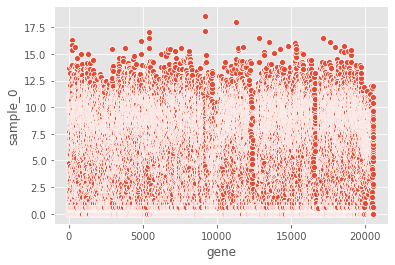

In [14]:
# first basic scatterplot visualization 
sns.scatterplot(y="sample_0", x='gene', data=data_transpose_new_headers_df)
plt.show()

Ok great, we've created the first visual, it is rough and small, so here is where we will start to make adjustments to get a better understanding of our gene data.

We'll adjust the size of the figure, the axis, and the level of transparancy of the points (here known as alpha).

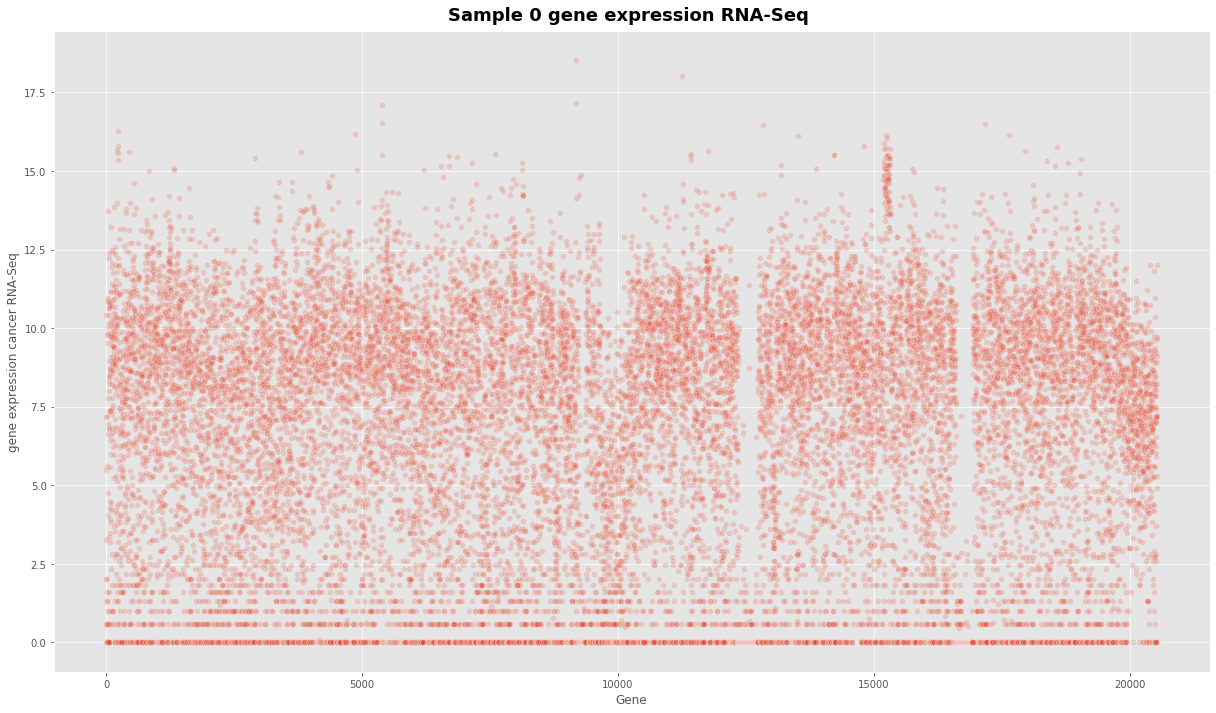

In [20]:
fig_dims = (17, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(ax=ax, y="sample_0", x='gene', data=data_transpose_new_headers_df,
               alpha=.2)

# make adjustments
ax.set_ylabel('gene expression cancer RNA-Seq')
ax.set_xlabel('Gene')

ax.text(x=0.5, y=1.01, s='Sample 0 gene expression RNA-Seq ', fontsize=18, 
        weight='bold', ha='center', va='bottom', transform=ax.transAxes)

fig.tight_layout()
plt.show()

Ok so now that we've plotted the gene sequence for one sample, lets see if we can get a better view as to how the different samples compare for each sample cancer type.

We need to add a the labels for the samples, which can be done for the 

In [47]:
data_wide = raw_data.copy()
data_wide['Class'] = data_labels.Class.values
data_wide.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Class
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,PRAD
sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,LUAD
sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0,PRAD
sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,PRAD
sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0,BRCA


In [52]:
data_wide_noindex = data_wide.reset_index()
data_wide_noindex['Unnamed: 0'] = data_wide_noindex.index
data_wide_noindex.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Class
0,0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,PRAD
1,1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,LUAD
2,2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0,PRAD
3,3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,PRAD
4,4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0,BRCA


In [53]:
data_wide_melt = data_wide_noindex.drop(columns=['Unnamed: 0']).melt(id_vars=['Class'])
data_wide_melt.head()

,Class,variable,value
0,PRAD,gene_0,0.0
1,LUAD,gene_0,0.0
2,PRAD,gene_0,0.0
3,PRAD,gene_0,0.0
4,BRCA,gene_0,0.0


In [54]:
data_melt = data_wide_melt.copy()
data_melt['variable'] = data_melt['variable'].map(lambda x: x.lstrip('gene_'))
data_melt.head()

,Class,variable,value
0,PRAD,0,0.0
1,LUAD,0,0.0
2,PRAD,0,0.0
3,PRAD,0,0.0
4,BRCA,0,0.0


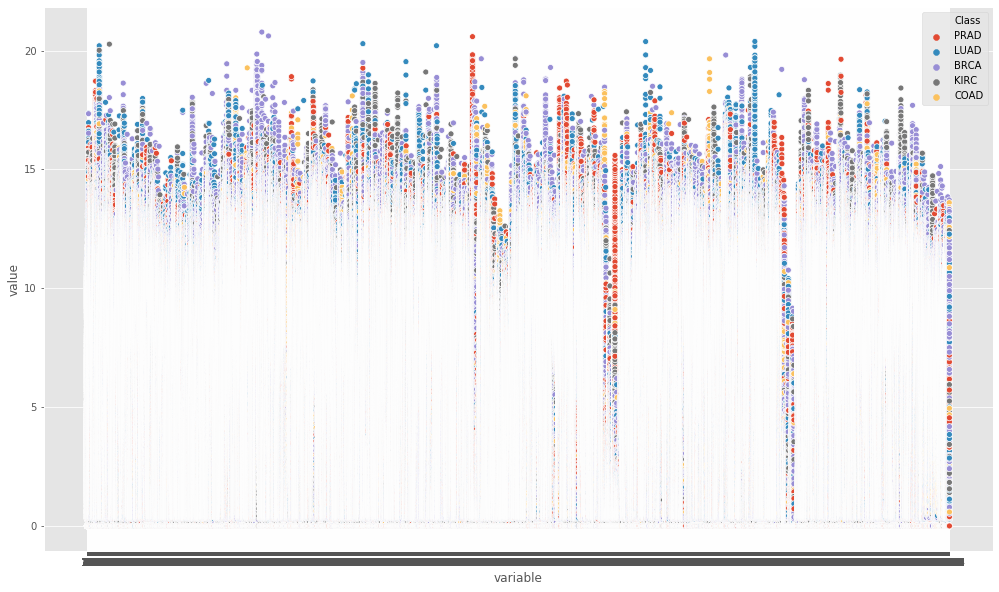

In [55]:
fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(ax=ax,data=data_melt, x="variable", y="value", hue="Class")

In [32]:
raw_data.loc[:, (raw_data != 0).any(axis=0)]

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,sample_796,0.0,1.865642,2.718197,7.350099,10.006003,6.764792,0.496922,0.0,0.0,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000
797,sample_797,0.0,3.942955,4.453807,6.346597,10.056868,7.320331,0.000000,0.0,0.0,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000
798,sample_798,0.0,3.249582,3.707492,8.185901,9.504082,7.536589,1.811101,0.0,0.0,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693
799,sample_799,0.0,2.590339,2.787976,7.318624,9.987136,9.213464,0.000000,0.0,0.0,...,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000


In [31]:
data_stat_describe.loc['max']

gene_0     1.482332
gene_1     6.237034
gene_2     6.063484
gene_3    10.129528
gene_4    11.355621
gene_5     0.000000
gene_6    10.718190
gene_7     2.779008
gene_8     1.785592
gene_9     4.067604
Name: max, dtype: float64

In [6]:

raw_data.set_index('Unnamed: 0',inplace=True)

In [25]:
data_transpose.reset_index(inplace=True)
data_transpose['gene'] = data_transpose.index

In [26]:
data_transpose.head()

Unnamed: 0,index,sample_0,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8,...,sample_792,sample_793,sample_794,sample_795,sample_796,sample_797,sample_798,sample_799,sample_800,gene
0,gene_0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.436588,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,gene_1,2.017209,0.592732,3.511759,3.663618,2.655741,3.467853,1.224966,2.854853,3.992125,...,4.337404,2.068224,4.288388,4.472176,1.865642,3.942955,3.249582,2.590339,2.325242,1
2,gene_2,3.265527,1.588421,4.327199,4.507649,2.821547,3.581918,1.691177,1.750478,2.772730,...,2.597126,0.857663,3.452490,4.908746,2.718197,4.453807,3.707492,2.787976,3.805932,2
3,gene_3,5.478487,7.586157,6.881787,6.659068,6.539454,6.620243,6.572007,7.226720,6.546692,...,6.070379,6.218739,7.209151,5.937848,7.350099,6.346597,8.185901,7.318624,6.530246,3
4,gene_4,10.431999,9.623011,9.870730,10.196184,9.738265,9.706829,9.640511,9.758691,10.488252,...,9.863990,10.623068,9.875620,9.330901,10.006003,10.056868,9.504082,9.987136,9.560367,4


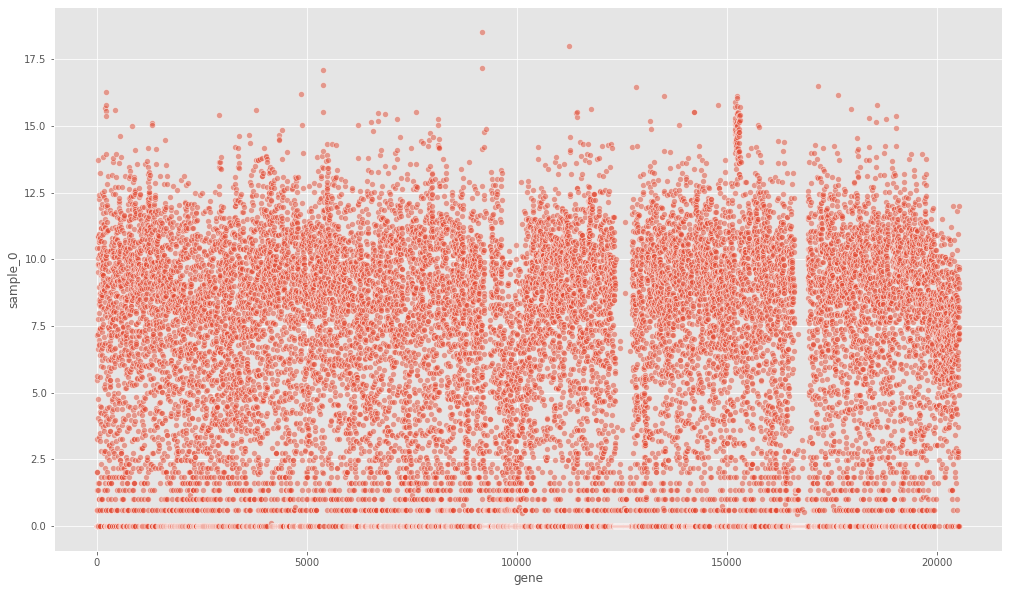

In [35]:
a4_dims = (17, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(ax=ax, y="sample_0", x='gene', data=data_transpose,
               alpha=.5)